In [5]:
base = '/p/multifacet/users/powerjg/backup/gpummu-hpca2014/run'
%cd $base
import getData
reload(getData)
matplotlib.rc('font', size=12, weight='normal')
matplotlib.rc('legend', fontsize=10)
matplotlib.rc('xtick', direction='in')
matplotlib.rc('xtick.major', size=4)
rot = 50
colors = ['#3377bb', '#33bb77', '#bb7733', '#bb3377']
from matplotlib.font_manager import FontProperties
font = FontProperties()
font.set_size('small')

/afs/cs.wisc.edu/p/multifacet/users/powerjg/backup/gpummu-hpca2014/run


In [6]:
bms =   ['backprop', 'bfs',      'gaussian', 'hotspot',  'lud'] # kmeans, lavaMD, cfd
sizes = ['simlarge', 'simlarge', 'simsmall', 'simlarge', 'sim1day']
bms +=  ['nn',       'nw',       'pathfinder', 'srad',     'sort']
sizes+= ['simlarge', 'simlarge', 'simlarge',   'simlarge',  'simlarge']

def getBms(path):
    %cd $path
    b = []
    for name,size in zip(bms, sizes):
        bm = getData.Benchmark('rodinia-nocopy')
        bm.name = name
        bm.biggest = size
        bm.fullsystem = True
        b.append(bm)
    getData.setupBenchmarks(b)
    return b
b128_0_0 = getBms(base+'/128-0-0')
b64_0_8k = getBms(base+'/64-0-8k')
b64_1024_0 = getBms(base+'/64-1024-0')
b32_512_8k = getBms(base+'/32-512-8k')
bbaseline = getBms(base+'/baseline')
bbaseline2 = getBms(base+'/inf-inf-inf')
b64_0_inf = getBms(base+'/64-0-inf')
#b128_0_0_infpw = getBms(base+'/128-0-0-inf-pw') #simlarge for sort, bfs, nw (&1day) run out of memory
bprefetch = getBms(base+'/64-0-8k-p')
bpercu_128 = getBms(base+'/perCU-128')
%cd $base

/afs/cs.wisc.edu/p/multifacet/users/powerjg/backup/gpummu-hpca2014/run/128-0-0
/afs/cs.wisc.edu/p/multifacet/users/powerjg/backup/gpummu-hpca2014/run/64-0-8k
/afs/cs.wisc.edu/p/multifacet/users/powerjg/backup/gpummu-hpca2014/run/64-1024-0
/afs/cs.wisc.edu/p/multifacet/users/powerjg/backup/gpummu-hpca2014/run/32-512-8k
/afs/cs.wisc.edu/p/multifacet/users/powerjg/backup/gpummu-hpca2014/run/baseline
/afs/cs.wisc.edu/p/multifacet/users/powerjg/backup/gpummu-hpca2014/run/inf-inf-inf
/afs/cs.wisc.edu/p/multifacet/users/powerjg/backup/gpummu-hpca2014/run/64-0-inf
/afs/cs.wisc.edu/p/multifacet/users/powerjg/backup/gpummu-hpca2014/run/64-0-8k-p
/afs/cs.wisc.edu/p/multifacet/users/powerjg/backup/gpummu-hpca2014/run/perCU-128
/afs/cs.wisc.edu/p/multifacet/users/powerjg/backup/gpummu-hpca2014/run


# Finding 1

### Figure 5 (memory ops PKC)

Average memory lane instructions PKC: 602.503665734
average shared lane: 334.053721174
average global lane: 268.449944559
average accesses: 39.3116536215
one global memory accesses for every 6.82876246173 global memory lane instructions
This is a 0.853560582081 reduction ( 6.82876246173 x )
Average global mem accesses PKC: 39.3116536215
Max global mem accesses PKC: 117.048785325


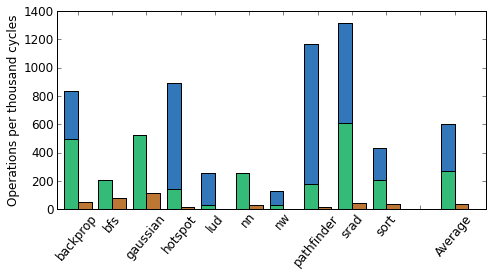

In [3]:
allaccesses = sum([getData.allMemAccessesPKC(bm) for bm in bbaseline])/len(bbaseline)
laneaccesses = sum([getData.memAccessesPKC(bm) for bm in bbaseline])/len(bbaseline)
globalaccesses = sum([getData.tlbPKCycle(bm) for bm in bbaseline])/len(bbaseline)
first = True
e = .2
w = .4
gap = .2
figure(figsize=(7,4))
for bm in bbaseline:
    if first:
        first = False
        bar(e, getData.allMemAccessesPKC(bm), width=w, color=colors[0], label="Shared mem lane instructions")
        bar(e, getData.memAccessesPKC(bm), width=w, color=colors[1], label="Global mem lane instructions")
        e += w
        bar(e, getData.tlbPKCycle(bm), width=w, color=colors[2], label="Global memory accesses")
        e += w
    else:
        bar(e, getData.allMemAccessesPKC(bm), width=w, color=colors[0])
        bar(e, getData.memAccessesPKC(bm), width=w, color=colors[1])
        e += w
        bar(e, getData.tlbPKCycle(bm), width=w, color=colors[2])
        e += w
    e += gap
e += gap + w*2
bar(e, allaccesses, width=w, color=colors[0])
bar(e, laneaccesses, width=w, color=colors[1])
e += w
bar(e, globalaccesses, width=w, color=colors[2])
e += w
bmNames = [bm.name for bm in bbaseline] + ['', 'Average']
bmNames = ['particlefilter' if i=='particlefilter_naive' else i for i in bmNames]
tw = w*2
xticks(arange(len(bmNames))*(tw+gap)+gap+(tw)/2, bmNames, rotation=rot)
#legend(loc='upper left', ncol=1)
#ylim((0,1500))
xlim((0,12.5))
ylabel('Operations per thousand cycles')
print "Average memory lane instructions PKC:", allaccesses
print "average shared lane:", (sum([getData.allMemAccessesPKC(bm) for bm in bbaseline])-sum([getData.memAccessesPKC(bm) for bm in bbaseline]))/len(bbaseline)
print "average global lane:", laneaccesses
print "average accesses:", globalaccesses
print "one global memory accesses for every", laneaccesses/globalaccesses, "global memory lane instructions"
print "This is a", 1-globalaccesses/laneaccesses, "reduction", "(", laneaccesses/globalaccesses, "x )"
print "Average global mem accesses PKC:", globalaccesses
print "Max global mem accesses PKC:", max([getData.tlbPKCycle(bm) for bm in bbaseline])
tight_layout()
savefig('mem_ops_pkc.png', dpi=600)

# Finding 2

### Figure: average page walk latency of per-CU pagewalkers compared to infinite number of pagewalkers

I bet the problem here is that since there are so many simultaneous requests, requests from one CU get queued behind requests from another CU.

### Figure: Average concurrent page walks

Worst case for design 3: 0.125905544128
Average d1: 0.3034547249 slowdown 3.29538451026
Average d2: 0.29981480886
Average d3: 0.986396429335
[ 0.09885423  0.05300799  0.91710031  0.32362244  0.84591207  0.21621842
  0.47121307  0.10630337  0.08068128  0.27030214]


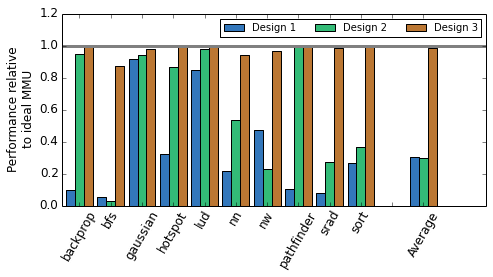

In [8]:
timebaseline = array([float(bm.totalActiveCycles) for bm in bbaseline])
d1 = timebaseline/array([bm.totalActiveCycles for bm in bpercu_128])
d2 = timebaseline/array([bm.totalActiveCycles for bm in b128_0_0])
d3 = timebaseline/array([bm.totalActiveCycles for bm in b64_0_8k])
first = True
e = .2
w = .4
gap = .2
figure(figsize=(7,4))
for i in range(len(timebaseline)):
    if first:
        first = False
        bar(e, d1[i], width=w, color=colors[0], label="Design 1")
        e += w
        bar(e, d2[i], width=w, color=colors[1], label="Design 2")
        e += w
        bar(e, d3[i], width=w, color=colors[2], label="Design 3")
        e += w
    else:
        bar(e, d1[i], width=w, color=colors[0])
        e += w
        bar(e, d2[i], width=w, color=colors[1])
        e += w
        bar(e, d3[i], width=w, color=colors[2])
        e += w
    e += gap
e += gap + w*3
bar(e, float(sum(timebaseline))/sum([bm.totalActiveCycles for bm in bpercu_128]), width=w, color=colors[0])
e += w
bar(e, float(sum(timebaseline))/sum([bm.totalActiveCycles for bm in b128_0_0]), width=w, color=colors[1])
e += w
bar(e, float(sum(timebaseline))/sum([bm.totalActiveCycles for bm in b64_0_8k]), width=w, color=colors[2])
e += w
bmNames = [bm.name for bm in bbaseline] + ['', 'Average']
bmNames = ['particlefilter' if i=='particlefilter_naive' else i for i in bmNames]
tw = w*3
xticks(arange(len(bmNames))*(tw+gap)+gap+(tw)/2, bmNames, rotation=60)
legend(prop=font, ncol=3)
ylabel('Performance relative\nto ideal MMU', multialignment='center')
hlines(1, 0, 19, color='grey', linewidth=3)
print "Worst case for design 3:", 1-min(d3) 
d1avg = float(sum(timebaseline))/sum([bm.totalActiveCycles for bm in bpercu_128])
print "Average d1:", d1avg, "slowdown", 1/d1avg
print "Average d2:", float(sum(timebaseline))/sum([bm.totalActiveCycles for bm in b128_0_0])
print "Average d3:", float(sum(timebaseline))/sum([bm.totalActiveCycles for bm in b64_0_8k])
tight_layout()
savefig('rel_perf.png', dpi=600)
#savefig('/p/multifacet/users/powerjg/prelim/figures/gpummu-results.eps')
print timebaseline/array([bm.totalActiveCycles for bm in bpercu_128])

Average average: 60.3987777
Max average: 139.726087
Average max: 277.3
NOTE: THIS IS NOT WEIGHTED ANYMORE


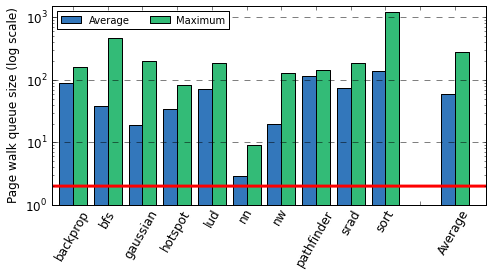

In [523]:
e = .2
w = .4
gap = .2
first = True
figure(figsize=(7,4))
for bm in bpercu_128:
    if first:
        # add +.01 if you get an error
        bar(e, bm.getStat('m5stats', 'system.gpu.shader_mmu.concurrentWalks::mean'), width=w, color=colors[0], label="Average", log=True)
        e += w
        bar(e, bm.getStat('m5stats', 'system.gpu.shader_mmu.concurrentWalks').mx, width=w, color=colors[1], label="Maximum", log=True)
        first = False
    else:
        bar(e, bm.getStat('m5stats', 'system.gpu.shader_mmu.concurrentWalks::mean'), width=w, color=colors[0], log=True)
        e += w
        bar(e, bm.getStat('m5stats', 'system.gpu.shader_mmu.concurrentWalks').mx, width=w, color=colors[1], log=True)
    e += w
    e += gap
e += w*2+gap
weighted = [bm.getStat('m5stats', 'system.gpu.shader_mmu.concurrentWalks::mean') for bm in bpercu_128]
weightedmx = [bm.getStat('m5stats', 'system.gpu.shader_mmu.concurrentWalks').mx for bm in bpercu_128]
bar(e, float(sum(weighted))/len(bpercu_128), width=w, color=colors[0], log=True)
e += w
bar(e, float(sum(weightedmx))/len(bpercu_128), width=w, color=colors[1], log=True)
yscale('log')
grid(True, axis='y', ls='--')
bmNames = [bm.name for bm in bbaseline] + ['', 'Average']
bmNames = ['particlefilter' if i=='particlefilter_naive' else i for i in bmNames]
xticks(arange(len(bmNames))*(w*2+gap)+gap+(w*2)/2, bmNames, rotation=60)
xlim((0,12.5))
ylim((1,1500))
hlines(2, 0, 13, color='red', linewidth=3)
legend(loc="upper left", ncol=2)
ylabel('Page walk queue size (log scale)')
tight_layout()
savefig('pw_queue.png', dpi=600)
print "Average average:", float(sum(weighted))/len(bpercu_128)
print "Max average:", max(weighted)
print "Average max:", float(sum(weightedmx))/len(bpercu_128)
print "NOTE: THIS IS NOT WEIGHTED ANYMORE"6.22

### Speedup of design 2 and 3 over design 1

Average speedup D1: 0.988005077063
Average speedup D2: 3.25055551421


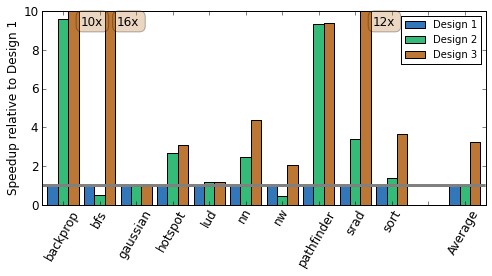

In [441]:
timebaseline = array([float(bm.totalActiveCycles) for bm in bpercu_128])
d2 = timebaseline/array([bm.totalActiveCycles for bm in b128_0_0])
d3 = timebaseline/array([bm.totalActiveCycles for bm in b64_0_8k])
e = .2
w = .4
gap = .2
figure(figsize=(7,4))
lim = 10
first = True
for i in range(len(timebaseline)):
    if first:
        first = False
        bar(e, 1, width=w, color=colors[0], label="Design 1")
        e += w
        bar(e, d2[i], width=w, color=colors[1], label="Design 2")
        e += w
        bar(e, d3[i], width=w, color=colors[2], label="Design 3")
        e += w
    else:
        bar(e, 1, width=w, color=colors[0])
        e += w
        bar(e, d2[i], width=w, color=colors[1])
        e += w
        bar(e, d3[i], width=w, color=colors[2])
        e += w
    e += gap
        
    if d3[i] > lim:
        annotate(str(int(d3[i]))+'x', xy=((arange(len(bmNames))*(tw+gap)+gap+(tw)/2)[i], lim), \
                 bbox=dict(boxstyle='round,pad=0.5', fc=colors[2], alpha=0.3), \
                 xytext = (19, -15), textcoords = 'offset points')
    if d2[i] > lim:
        annotate(str(int(d2[i]))+'x', xy=((arange(len(bmNames))*(tw+gap)+gap+(tw)/2)[i], lim), \
                 bbox=dict(boxstyle='round,pad=0.5', fc=colors[1], alpha=0.3), \
                 xytext = (-16, -15), textcoords = 'offset points')
e += gap + w*3
bar(e, 1, width=w, color=colors[0])
e += w
bar(e, float(sum(timebaseline))/sum([bm.totalActiveCycles for bm in b128_0_0]), width=w, color=colors[1])
e += w
bar(e, float(sum(timebaseline))/sum([bm.totalActiveCycles for bm in b64_0_8k]), width=w, color=colors[2])
e += w
ylim((0,lim))
xlim((0,17))
hlines(1, 0, 17, color='grey', linewidth=3)
bmNames = [bm.name for bm in bbaseline] + ['', 'Average']
bmNames = ['particlefilter' if i=='particlefilter_naive' else i for i in bmNames]
tw = w*3
xticks(arange(len(bmNames))*(tw+gap)+gap+(tw)/2, bmNames, rotation=60)
ylabel('Speedup relative to Design 1')
legend()
tight_layout()
savefig('rel_perf_1_2_3.png', dpi=600)
print "Average speedup D1:",  float(sum(timebaseline))/sum([bm.totalActiveCycles for bm in b128_0_0])
print "Average speedup D2:",  float(sum(timebaseline))/sum([bm.totalActiveCycles for bm in b64_0_8k])

# Finding 3

### Figure: TLB Miss rate

Average miss rate: 0.290589595693
Max miss rate: 0.671991013389


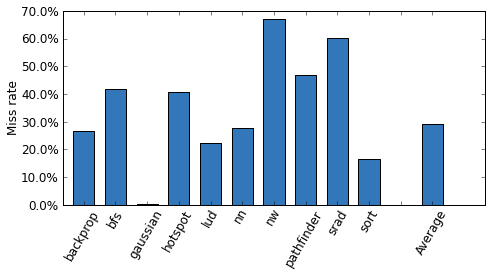

In [524]:
e = .2
w = .4
gap = .2
figure(figsize=(7,4))
for bm in b128_0_0:
    bar(e, (1-getData.tlbHitRate(bm))*100, width=w, color=colors[0])
    e += w
    e += gap
e += w+gap
misses = sum([getData.totalTLBMiss(bm) for bm in b128_0_0])
hits = sum([getData.totalTLBHit(bm) for bm in b128_0_0])
bar(e, float(misses)/(hits+misses) * 100, width=w, color=colors[0])
bmNames = [bm.name for bm in bbaseline] + ['', 'Average']
bmNames = ['particlefilter' if i=='particlefilter_naive' else i for i in bmNames]
xticks(arange(len(bmNames))*(w+gap)+gap+(w)/2, bmNames, rotation=60)
ylabel('Miss rate')
print "Average miss rate:", float(misses)/(hits+misses)
print "Max miss rate:", max([1-getData.tlbHitRate(bm) for bm in b128_0_0])
from matplotlib.ticker import FuncFormatter
gca().yaxis.set_major_formatter(FuncFormatter(lambda y, position: str(y)+'%'))
tight_layout()
savefig('miss_rate.png', dpi=600)

### Figure: TLB Miss PKC

Average misses PKC: 1.42145965551
Max misses PKC: 12.9517447675


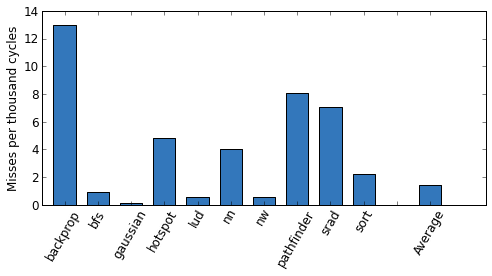

In [517]:
e = .2
w = .4
gap = .2
figure(figsize=(7,4))
for bm in b128_0_0:
    bar(e, getData.tlbMissPKC(bm), width=w, color=colors[0])
    e += w
    e += gap
e += w+gap
misses = sum([getData.totalTLBMiss(bm) for bm in b128_0_0])
hits = sum([getData.totalTLBHit(bm) for bm in b128_0_0])
cycles = sum([bm.totalActiveCycles for bm in b128_0_0])
bar(e, float(misses)/(cycles)*1000, width=w, color=colors[0])
bmNames = [bm.name for bm in bbaseline] + ['', 'Average']
bmNames = ['particlefilter' if i=='particlefilter_naive' else i for i in bmNames]
xticks(arange(len(bmNames))*(w+gap)+gap+(w)/2, bmNames, rotation=60)
ylabel('Misses per thousand cycles')
print "Average misses PKC:", float(misses)/(cycles)*1000
print "Max misses PKC:", max([getData.tlbMissPKC(bm) for bm in b128_0_0])
tight_layout()
savefig('miss_pkc.png', dpi=600)

# Results

### Design 1, 2, and 3 relative to ideal MMU

### Sharing pattern

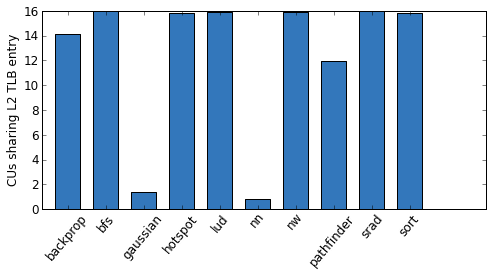

In [482]:
e = .2
w = .4
gap = .2
figure(figsize=(7,4))
for bm in b64_1024_0:
    bar(e, bm.getStat('m5stats', 'system.gpu.shader_mmu.l2Sharers::mean'), width=w, color=colors[0])
    e += w
    e += gap
bmNames = [bm.name for bm in bbaseline]
bmNames = ['particlefilter' if i=='particlefilter_naive' else i for i in bmNames]
xticks(arange(len(bmNames))*(w+gap)+gap+(w)/2, bmNames, rotation=rot)
ylim((0,16))
ylabel("CUs sharing L2 TLB entry")
tight_layout()
savefig('sharing.png', dpi=600)

### Other designs

BFS with 32-512-8k: 0.892865086929
BFS with 64-0-inf: 0.962639565301
NW with 64-0-inf: 0.993998526389
average shared l2 pwc: 0.987681541834
average with ideal: 0.997207642569


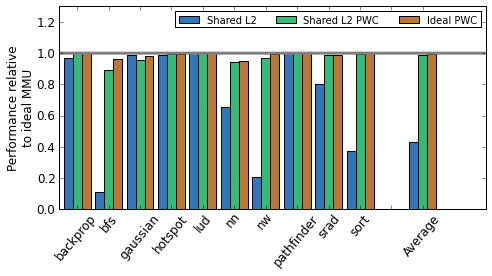

In [9]:
timebaseline = array([float(bm.totalActiveCycles) for bm in bbaseline])
l21 = timebaseline/array([bm.totalActiveCycles for bm in b64_1024_0])
l22 = timebaseline/array([bm.totalActiveCycles for bm in b32_512_8k])
idealpwc = timebaseline/array([bm.totalActiveCycles for bm in b64_0_inf])
first = True
e = .2
w = .4
gap = .2
figure(figsize=(7,4))
for i in range(len(timebaseline)):
    if first:
        first = False
        bar(e, l21[i], width=w, color=colors[0], label="Shared L2")
        e += w
        bar(e, l22[i], width=w, color=colors[1], label="Shared L2 PWC")
        e += w
        bar(e, idealpwc[i], width=w, color=colors[2], label="Ideal PWC")
        e += w
    else:
        bar(e, l21[i], width=w, color=colors[0])
        e += w
        bar(e, l22[i], width=w, color=colors[1])
        e += w
        bar(e, idealpwc[i], width=w, color=colors[2])
        e += w
    e += gap
e += gap + w*3
bar(e, float(sum(timebaseline))/sum([bm.totalActiveCycles for bm in b64_1024_0]), width=w, color=colors[0])
e += w
bar(e, float(sum(timebaseline))/sum([bm.totalActiveCycles for bm in b32_512_8k]), width=w, color=colors[1])
e += w
bar(e, float(sum(timebaseline))/sum([bm.totalActiveCycles for bm in b64_0_inf]), width=w, color=colors[2])
e += w
bmNames = [bm.name for bm in bbaseline] + ['', 'Average']
bmNames = ['particlefilter' if i=='particlefilter_naive' else i for i in bmNames]
tw = w*3
xticks(arange(len(bmNames))*(tw+gap)+gap+(tw)/2, bmNames, rotation=rot)
legend(prop=font, ncol=3)
ylim((0,1.3))
ylabel('Performance relative\nto ideal MMU', multialignment='center')
hlines(1, 0, 19, color='grey', linewidth=3)
tight_layout()
savefig('rel_perf_other.png', dpi=600)
print "BFS with 32-512-8k:", l22[1]
print "BFS with 64-0-inf:", idealpwc[1]
print "NW with 64-0-inf:", idealpwc[6]
print "average shared l2 pwc:", float(sum(timebaseline))/sum([bm.totalActiveCycles for bm in b32_512_8k])
print "average with ideal:", float(sum(timebaseline))/sum([bm.totalActiveCycles for bm in b64_0_inf])
%pwd

### Prefetcher performance

Average relative performance: 0.990918545043


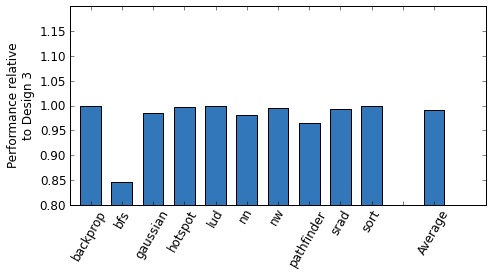

In [451]:
timebaseline = array([float(bm.totalActiveCycles) for bm in b64_0_8k])
pref = timebaseline/array([bm.totalActiveCycles for bm in bprefetch])
first = True
e = .2
w = .4
gap = .2
figure(figsize=(7,4))
for i in range(len(timebaseline)):
    if first:
        first = False
        bar(e, pref[i], width=w, color=colors[0])
        e += w
    else:
        bar(e, pref[i], width=w, color=colors[0])
        e += w
    e += gap
e += gap + w
bar(e, float(sum(timebaseline))/sum([bm.totalActiveCycles for bm in bprefetch]), width=w, color=colors[0])
e += w
bmNames = [bm.name for bm in bbaseline] + ['', 'Average']
bmNames = ['particlefilter' if i=='particlefilter_naive' else i for i in bmNames]
tw = w
xticks(arange(len(bmNames))*(tw+gap)+gap+(tw)/2, bmNames, rotation=rot)
legend(prop=font)
ylim((.8,1.2))
ylabel('Performance relative\nto Design 3', multialignment='center')
#hlines(1, 0, 19, color='grey', linewidth=3)
tight_layout()
#savefig('rel_perf_other.png', dpi=600)
print "Average relative performance:", float(sum(timebaseline))/sum([bm.totalActiveCycles for bm in bprefetch])

### Random power/area data

Design 2 	1 	1.0
Shared L2 	0.8125 	0.827802620494
Design 3 	4.625 	0.864248844416
Shared L2 PWC 	1.25 	0.77576521799


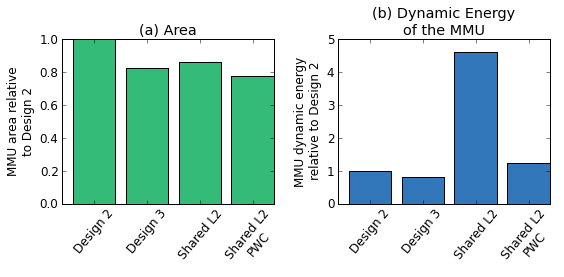

In [490]:
energy = [1, float(13)/16, float(74)/16, float(20)/16]
area = [1.0198384, 0.8442249, 0.881394158690578, 0.791155158690578]
area = [i/area[0] for i in area]
w = .4
g = .1
e = g
figure(figsize=(8,4))
subplot(122)
for i in range(4):
    bar(e, energy[i], width=w, color=colors[0])
    e += w + g
tw = w+g
xticks(arange(4)*(tw)+tw/2+g/2, ["Design 2", "Design 3", "Shared L2", "Shared L2\nPWC"], rotation=rot)
ylabel('MMU dynamic energy\nrelative to Design 2', multialignment='center')
title('(b) Dynamic Energy\nof the MMU')
subplot(121)
e = g
for i in range(4):
    bar(e, area[i], width=w, color=colors[1])
    e += w + g
xticks(arange(4)*(tw)+tw/2+g/2, ["Design 2", "Design 3", "Shared L2", "Shared L2\nPWC"], rotation=rot)
ylabel('MMU area relative\nto Design 2', multialignment='center')
title('(a) Area')
tight_layout()
for i in range(4):
    print ["Design 2", "Shared L2", "Design 3", "Shared L2 PWC"][i], '\t', energy[i], '\t', area[i]
savefig('energy_area.png', dpi=600)

In [484]:
misses = sum([getData.totalTLBMiss(bm) for bm in b64_1024_0])
hits = sum([getData.totalTLBHit(bm) for bm in b64_1024_0])
print "Average miss rate for 64_1024_0:", float(misses)/(misses+hits)

Average miss rate for 64_1024_0: 0.268029268781


### Working set sizes:

In [452]:
getData.printStats(bbaseline2, [lambda bm: bm.getStat('m5stats', 'system.gpu.shader_mmu.numPagewalks')*4/float(1024)])

                                                   <lambda>          
rodinia-nocopy backprop simlarge                   74.03             
rodinia-nocopy bfs simlarge                        37.22             
rodinia-nocopy gaussian simsmall                   0.34              
rodinia-nocopy hotspot simlarge                    12.01             
rodinia-nocopy lud sim1day                         4.02              
rodinia-nocopy nn simlarge                         0.5               
rodinia-nocopy nw simlarge                         128.06            
rodinia-nocopy pathfinder simlarge                 38.54             
rodinia-nocopy srad simlarge                       96.01             
rodinia-nocopy sort simlarge                       208.01            


In [110]:
stats = [lambda bm: bm.totalActiveCycles, lambda bm: bm.ipc, getData.totalTLBMiss, getData.tlbHitRate]
labels = ['Active cycles', 'IPC', 'TLB Misses', 'TLB Hit rate']
bms = [b128_0_0, b64_0_8k, b128_0_0_infpw, bbaseline]
names = ["128-0-0", "64-0-8k", "b128_0_0_infpw", "baseline"]
getData.compareStat(lambda bm: bm.sumShaderStat('lsq.tlbMissLatency').avg, bms, "Average miss latency", names)
getData.compareStat(lambda bm: bm.ipc, bms, "IPC", names)
getData.compareStat(lambda bm: bm.totalActiveCycles, bms, "IPC", names)
getData.compareStat(getData.avgPFLatency, bms, "Average page fault latency", names)
getData.compareStat(lambda bm: bm.getStat('m5stats', 'system.gpu.shader_mmu.concurrentWalks::mean'), bms, "Outstanding walks", names)

 Average miss latency
                               128-0-0              64-0-8k              b128_0_0_infpw       baseline            
backprop                       672.57(1.00)         141.07(0.21)         701.27(1.04)         215.37(0.32)        
bfs                            4653.36(1.00)        27.03(0.01)          4779.42(1.03)        23.20(0.00)         
gaussian                       2636.10(1.00)        25.11(0.01)          2791.59(1.06)        4.40(0.00)          
hotspot                        763.89(1.00)         47.21(0.06)          763.89(1.00)         15.69(0.02)         
kmeans                         966.50(1.00)         303.31(0.31)         949.45(0.98)         191.60(0.20)        
lud                            1664.61(1.00)        26.73(0.02)          1661.83(1.00)        5.18(0.00)          
nn                             360.28(1.00)         34.77(0.10)          378.12(1.05)         7.38(0.02)          
nw                             4649.40(1.00)        40.06(